Homework 2, Kimberly Hess


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from  astropy.io import fits
from  astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyOffsetFrame, ICRS, SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astroquery.gaia import Gaia


In [118]:
#finding the directory
dir_ = "../../Notes/2020_02_04_Astropy_and_Fits/data/"
!ls $dir_

PTF_201307021787_c_p_scie_t041723_u016616794_f02_p003486_c11.ctlg.gz
PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [119]:
#Loading image
imageName='PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'

f = fits.open(dir_+imageName)
data = f[0].data #this is the image array

print((dir_+imageName))

../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [120]:
#Looking at the header
header = f[0].header
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

1.  What is the difference between wcs_pix2world() and all_pix2world() ?

From pixels to world coordinates:

all_pix2world: Perform all three transformations in series (core WCS, SIP and table lookup distortions) from pixel to world coordinates. Use this one if you’re not sure which to use.
wcs_pix2world: Perform just the core WCS transformation from pixel to world coordinates.

From world to pixel coordinates:

all_world2pix: Perform all three transformations (core WCS, SIP and table lookup distortions) from world to pixel coordinates, using an iterative method if necessary.
wcs_world2pix: Perform just the core WCS transformation from world to pixel coordinates.

2. What is a SIP convention for representing distortions (in one sentence)? "The Simple Imaging Polynomial, or SIP, convention provides a straightforward means for storing distortion information in FITS image headers. SIP was initially developed before the launch of the Spitzer Space Telescope. Images from the Spitzer instruments are distorted by a few percent relative to a regular sky grid. This distortion, expressed as a function of pixel position, is well- represented by polynomials, and it was desired to store the distortion information in the FITS headers of each Basic Calibrated Data (BCD) product.."Shupe, D.L., Caltech 2008

In [121]:
#Please query objects within a radius of 15 arcminutes of RA = 217.309, dec = 16.658   (J2000 ICRS coordinates)

# works only for ICRS coordinates:
target = ICRS(217.309*u.deg, 16.658*u.deg)
print(target)
#c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')
#r = 15 * u.arcminute
#result_table = Simbad.query_region(c, radius=r)

<ICRS Coordinate: (ra, dec) in deg
    (217.309, 16.658)>


In [122]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=217.309, dec=16.658, unit=(u.degree, u.degree), frame='icrs')
r = Gaia.query_object_async(coordinate=coord, radius=15*u.arcminute)
r

INFO: Query finished. [astroquery.utils.tap.core]


solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object,float64
1635721458409799680,Gaia DR2 1235408451766174976,1235408451766174976,496268710,2015.5,217.30596259874648,0.09513321493232176,16.66518682402546,0.1044837869944028,0.2761684890724872,0.1293665051906745,2.1347759,-8.517433716371416,0.1925673390429867,-19.08419729692951,0.21010305962851203,0.09424466,-0.32048658,-0.034990575,-0.14715552,-0.42357677,0.03668093,-0.40176144,-0.17969242,0.34068424,-0.1008859,143,0,141,2,0.6940575,147.06735,0.0,0.0,31,False,1.8161185,1.5777015016803506,0.031021078586617894,-0.123331,16,9,0.20185892,0,16,False,140,1890.479147547748,2.3918115938748294,790.39636,17.496937,13,1026.0790421244978,13.19970683883879,77.734985,17.823437,12,1245.7918353116172,7.940453638501775,156.89177,17.023306,1.2017434,0,0.80013084,0.32649994,0.4736309,--,--,0,--,--,--,NOT_AVAILABLE,13.169747169625188,65.08510838476725,208.78361144202552,29.608393706470675,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+1235408451766174976,--,0.007753976563897576
1635721458409799680,Gaia DR2 1235408447471375488,1235408447471375488,780409170,2015.5,217.30111036522848,0.8917114474016802,16.664289614575587,1.3944646136404488,2.369628538902968,1.3243410130916202,1.7892888,-4.486254444912251,2.436948945

In [123]:
hdulist = fits.open(dir_+imageName)

In [124]:
w = wcs.WCS(hdulist[0].header)
print(w.wcs.name)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [125]:
 w.wcs.print_contents()

In [126]:
 pixcrd = np.array([r["ra"], r["dec"],]).T
#px_cord=wcs_world2pix["ra"], r["dec"]
pixcrd

array([[217.3059626 ,  16.66518682],
       [217.30111037,  16.66428961],
       [217.30419857,  16.67094984],
       ...,
       [217.23418848,  16.89742289],
       [217.07045214,  16.75933061],
       [217.34922894,  16.90498424]])

In [127]:
world =w.wcs_world2pix(pixcrd, 1)
print(world)

[[1484.98433027  584.31404285]
 [1468.42515455  587.60205066]
 [1478.83219079  563.8360864 ]
 ...
 [1235.00668515 -240.93654819]
 [ 678.66128546  253.34763746]
 [1627.41797316 -270.06566022]]


In [128]:
f = fits.open(dir_+imageName)
data = f[0].data #this is the image array

print((dir_+imageName))



../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


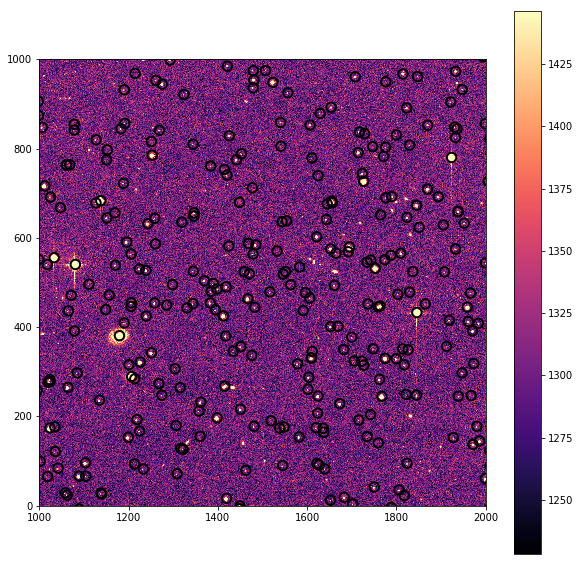

In [129]:
mean=np.mean(data)
median=np.median(data)
sigma=np.std(data)


plt.figure(figsize=(10,10))

vmin=mean-.1*sigma
vmax=mean+.1*sigma
plt.imshow(data, vmin=vmin, vmax=vmax, cmap='magma')
plt.colorbar()
plt.ylim(0,1000)
plt.xlim(1000,2000)
plt.scatter(world.T[0], world.T[1], marker='o',color='k',linewidths=2, facecolors='none', s=90)



In [130]:
def findstars(image):
    sy,sx=image.shape
    npad = 5
    nstar= 10
    blankval=-1
    x=np.zeros(nstar).astype('int32')
    y=np.zeros(nstar).astype('int32')
    flux=np.zeros(nstar)
   # image[0:npad,:]=blankval
    #image[:,0:npad]=blankval
    image[-npad-1:-1,:]=blankval
    image[:,-npad-1:-1]=blankval

    # loop over stars
    for i in np.arange(nstar):
        indmax = np.argmax(image)
        y[i], x[i] = np.unravel_index(indmax, image.shape)
        flux[i] =  image[y[i],x[i]]
        
        print(i, x[i], y[i], flux[i])
        
        image[y[i]-npad : y[i]+npad, x[i]-npad : x[i]+npad] = blankval


    return x, y, flux


0 1673 1668 61444.5859375
1 665 2539 61394.6328125
2 1016 3520 61387.54296875
3 1938 2040 61381.96875
4 1847 2404 61360.7578125
5 667 2518 61337.234375
6 1624 3262 61337.02734375
7 378 966 61324.65625
8 467 2015 61314.72265625
9 901 3829 61306.203125


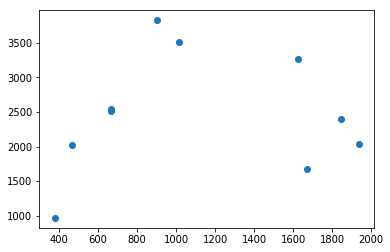

In [131]:
x, y, flux=findstars(data)
plt.scatter(x,y)

In [132]:
x, y, flux=findstars(data)

0 668 2526 61232.44921875
1 1127 3644 61218.6328125
2 369 1095 61217.984375
3 665 2489 61211.69921875
4 1081 539 61206.00390625
5 204 255 61200.72265625
6 552 3273 61195.46484375
7 1034 553 61187.08203125
8 665 2533 61180.328125
9 2041 210 61179.12109375


In [133]:
y

array([2526, 3644, 1095, 2489,  539,  255, 3273,  553, 2533,  210],
      dtype=int32)

0 1925 779 61087.76953125
1 316 1165 61087.3515625
2 667 2569 61086.2265625
3 667 2578 61082.84765625
4 1918 2265 61082.1875
5 1138 681 61080.46875
6 491 1810 61077.99609375
7 1846 430 61077.4453125
8 1263 2875 61077.01171875
9 379 989 61074.65625


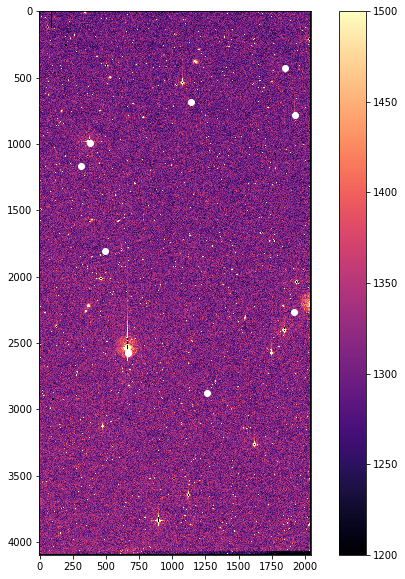

In [143]:
x, y, flux=findstars(data)
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=1200, vmax=1500, cmap='magma')
plt.colorbar()
plt.scatter(x,y,color='w')
# plt.ylim(0,1000)
# plt.xlim(1000,2000)

